In [3]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3 as sql

In [4]:
conn = sql.connect("./imdb_dataset/movies.sqlite")

cur = conn.cursor()
movies = cur.execute("SELECT * FROM movies") # Get all the movies
print(movies.description) # Get the column names

(('id', None, None, None, None, None, None), ('original_title', None, None, None, None, None, None), ('budget', None, None, None, None, None, None), ('popularity', None, None, None, None, None, None), ('release_date', None, None, None, None, None, None), ('revenue', None, None, None, None, None, None), ('title', None, None, None, None, None, None), ('vote_average', None, None, None, None, None, None), ('vote_count', None, None, None, None, None, None), ('overview', None, None, None, None, None, None), ('tagline', None, None, None, None, None, None), ('uid', None, None, None, None, None, None), ('director_id', None, None, None, None, None, None))


In [5]:
movies =cur.fetchall()

moviesDF = pd.DataFrame(movies, columns=['id', 'original_title', 'budget','popularity', 'release_date', 'revenue', 'title', 'vote_average', 'vote_count', 'overview', 'tagline', 'uid', 'director_id' ])

print(moviesDF.head())

print(moviesDF.info)

      id                            original_title     budget  popularity  \
0  43597                                    Avatar  237000000         150   
1  43598  Pirates of the Caribbean: At World's End  300000000         139   
2  43599                                   Spectre  245000000         107   
3  43600                     The Dark Knight Rises  250000000         112   
4  43601                               John Carter  260000000          43   

  release_date     revenue                                     title  \
0   2009-12-10  2787965087                                    Avatar   
1   2007-05-19   961000000  Pirates of the Caribbean: At World's End   
2   2015-10-26   880674609                                   Spectre   
3   2012-07-16  1084939099                     The Dark Knight Rises   
4   2012-03-07   284139100                               John Carter   

   vote_average  vote_count  \
0           7.2       11800   
1           6.9        4500   
2          

In [6]:
# Find all movies with directors
_cursor = cur.execute('SELECT * FROM directors')

directors = _cursor.fetchall()

directorsDF = pd.DataFrame(directors, columns = ['name', 'id', 'gender', 'uid', 'department'])
directorsDF.head()

,name,id,gender,uid,department
0,James Cameron,4762,2,2710,Directing
1,Gore Verbinski,4763,2,1704,Directing
2,Sam Mendes,4764,2,39,Directing
3,Christopher Nolan,4765,2,525,Directing
4,Andrew Stanton,4766,2,7,Directing


In [7]:
directorsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2349 entries, 0 to 2348
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        2349 non-null   object
 1   id          2349 non-null   int64 
 2   gender      2349 non-null   int64 
 3   uid         2349 non-null   int64 
 4   department  2349 non-null   object
dtypes: int64(3), object(2)
memory usage: 91.9+ KB


In [8]:
# Budget analysis
# Sort from most expensive movie going down.

_cursor = cur.execute('SELECT original_title, name, release_date, budget, revenue FROM movies JOIN directors ON movies.director_id = directors.id ORDER BY budget DESC')
mostExpensive = _cursor.fetchall()
mostExpensiveDF = pd.DataFrame(mostExpensive, columns = ['original_title', 'director_name', 'release_date', 'budget', 'revenue'])
mostExpensiveDF.head(10)


,original_title,director_name,release_date,budget,revenue
0,Pirates of the Caribbean: On Stranger Tides,Rob Marshall,2011-05-14,380000000,1045713802
1,Pirates of the Caribbean: At World's End,Gore Verbinski,2007-05-19,300000000,961000000
2,Avengers: Age of Ultron,Joss Whedon,2015-04-22,280000000,1405403694
3,Superman Returns,Bryan Singer,2006-06-28,270000000,391081192
4,John Carter,Andrew Stanton,2012-03-07,260000000,284139100
5,Tangled,Byron Howard,2010-11-24,260000000,591794936
6,Spider-Man 3,Sam Raimi,2007-05-01,258000000,890871626
7,The Lone Ranger,Gore Verbinski,2013-07-03,255000000,89289910
8,The Dark Knight Rises,Christopher Nolan,2012-07-16,250000000,1084939099
9,Harry Potter and the Half-Blood Prince,David Yates,2009-07-07,250000000,933959197


C:\Users\tiogo\AppData\Local\Temp\ipykernel_14600\3821076277.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=released_dates, rotation=45, ha='right')


[Text(0, 0, '2011-05-14'),
 Text(1, 0, '2007-05-19'),
 Text(2, 0, '2015-04-22'),
 Text(3, 0, '2006-06-28'),
 Text(4, 0, '2012-03-07'),
 Text(5, 0, '2010-11-24'),
 Text(6, 0, '2007-05-01'),
 Text(7, 0, '2013-07-03'),
 Text(8, 0, '2012-07-16'),
 Text(9, 0, '2009-07-07'),
 Text(10, 0, '2016-03-23'),
 Text(11, 0, '2014-12-10'),
 Text(12, 0, '2013-12-11'),
 Text(13, 0, '2016-04-27'),
 Text(14, 0, '2014-05-15'),
 Text(15, 0, '2012-11-26'),
 Text(16, 0, '2015-10-26'),
 Text(17, 0, '2009-12-10'),
 Text(18, 0, '2013-06-12'),
 Text(19, 0, '2008-05-15'),
 Text(20, 0, '2012-05-23'),
 Text(21, 0, '2012-04-25'),
 Text(22, 0, '2012-06-27'),
 Text(23, 0, '2006-05-24'),
 Text(24, 0, '2014-06-25'),
 Text(25, 0, '2012-04-11'),
 Text(26, 0, '2005-12-14'),
 Text(27, 0, '2008-10-30'),
 Text(28, 0, '2006-06-20'),
 Text(29, 0, '2010-05-12'),
 Text(30, 0, '1997-11-18'),
 Text(31, 0, '2012-10-25'),
 Text(32, 0, '2004-06-25'),
 Text(33, 0, '2013-04-18'),
 Text(34, 0, '2010-03-03'),
 Text(35, 0, '2013-06-20'),
 T

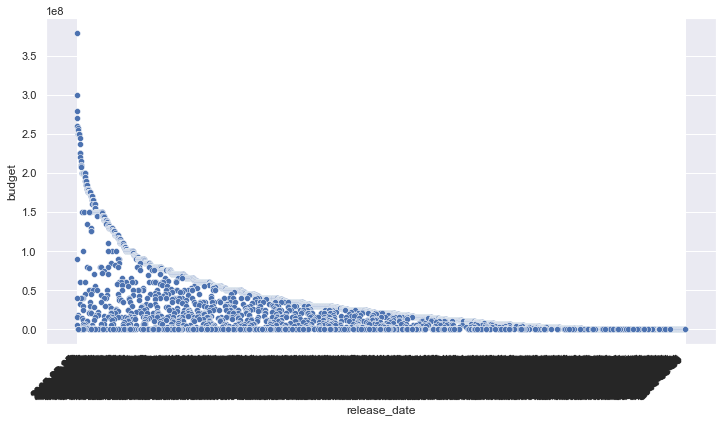

In [14]:
# Plot the movies budgets in a scatter plot with the released dates
sns.set(style="darkgrid")
sns.relplot(x="release_date", y="budget", data=mostExpensiveDF)

In [ ]:
# Needs to fix the x asis to show released dates.